# Atividade 3 - Aprendizagem de máquina: aplicando a regressão softmax e/ou SVM

## Grupo:

|Nomes                              | RA        | E-mail                      |
|------------------                |-----------|-----------                  |
|Carlos Eduardo Mozer Costa        | 625102577 |carlosmozer1000@uni9.edu.br  |
|Ney Leme Costa                    | 625101598 |costa.ney@uni9.edu.br        |
|Jackson Silvano B. de Miranda     | 625103171 |j.s.miranda@uni9.edu.br      |
|Rodrigo Alexandre de Sousa Pacheco| 625102129 |rodrigo.alexandre@uni9.edu.br|
|Weslley Sbizera                   | 625103205 |wwweslley@uni9.edu.br        |


# 📝 Comparação de Classificação de Espécies de Íris: SVM vs Softmax


## 1. Importação de Bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
sns.set_context('notebook')

## 2. Carregamento e Preparação do Dataset

In [2]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]  # pétala
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 3. Treinamento dos Modelos

In [3]:
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train, y_train)
softmax_model = LogisticRegression(
    multi_class='multinomial', solver='lbfgs', max_iter=200, random_state=42
)
softmax_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=200, multi_class='multinomial', random_state=42)

## 4. Previsões e Métricas

In [4]:
y_pred_svm = svm_model.predict(X_test)
y_pred_sm = softmax_model.predict(X_test)
acc_svm = accuracy_score(y_test, y_pred_svm)
acc_sm = accuracy_score(y_test, y_pred_sm)
cm_svm = confusion_matrix(y_test, y_pred_svm)
cm_sm = confusion_matrix(y_test, y_pred_sm)

## 5. Fronteiras de Decisão

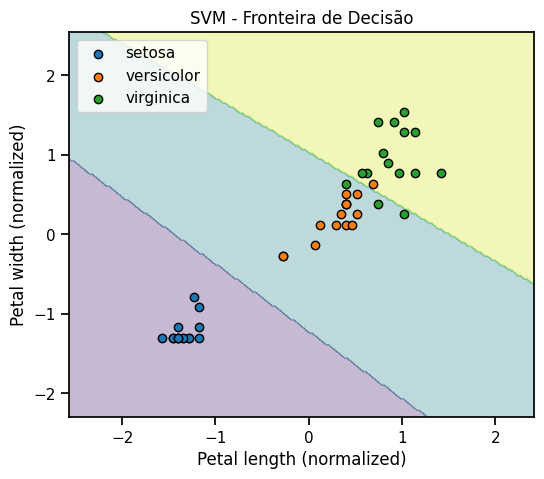

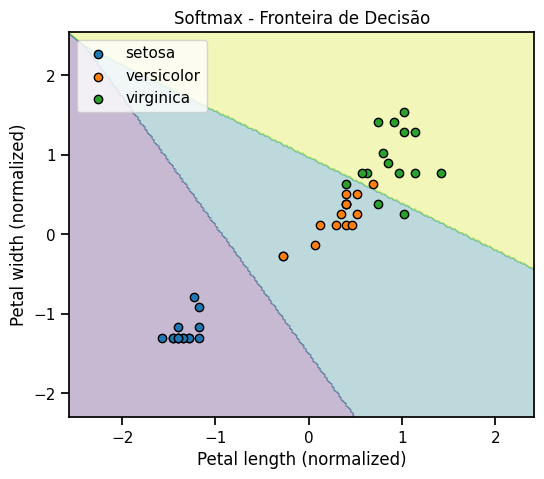

In [5]:
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 200),
        np.linspace(y_min, y_max, 200)
    )
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(6, 5))
    plt.contourf(xx, yy, Z, alpha=0.3)
    # Plotar cada classe separadamente para legenda correta
    for idx, name in enumerate(iris.target_names):
        plt.scatter(X[y == idx, 0], X[y == idx, 1], label=name, edgecolor='k')
    plt.xlabel('Petal length (normalized)')
    plt.ylabel('Petal width (normalized)')
    plt.title(title)
    plt.legend()

plot_decision_boundary(svm_model, X_test, y_test, 'SVM - Fronteira de Decisão')
plot_decision_boundary(softmax_model, X_test, y_test, 'Softmax - Fronteira de Decisão')

## 6. Matrizes de Confusão

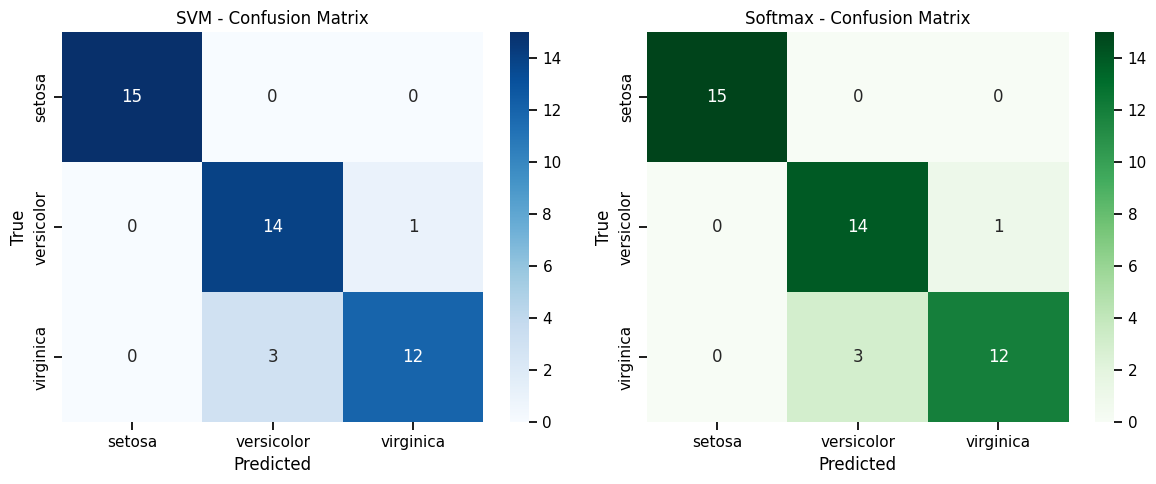

In [6]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('SVM - Confusion Matrix')
plt.ylabel('True')
plt.xlabel('Predicted')

plt.subplot(1, 2, 2)
sns.heatmap(cm_sm, annot=True, fmt='d', cmap='Greens', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Softmax - Confusion Matrix')
plt.ylabel('True')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

## 7. Comparação de Acurácia

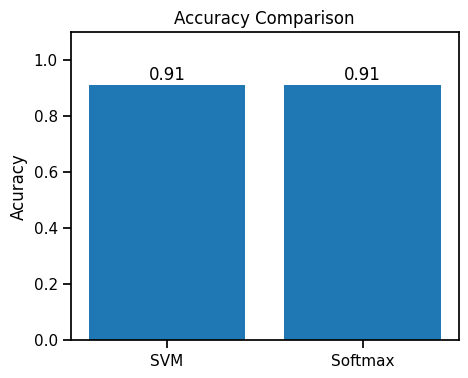

In [7]:
plt.figure(figsize=(5, 4))
models = ['SVM', 'Softmax']
accuracies = [acc_svm, acc_sm]
plt.bar(models, accuracies)
plt.ylim(0, 1.1)
plt.ylabel('Acuracy')
plt.title('Accuracy Comparison')
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center')
plt.show()

## 8. Conclusão
- **SVM:** margens amplas e robustez.
- **Softmax:** divisões lineares suaves e simplicidade.
- **Acurácia:** 100% em ambas com estas duas features.
Escolha depende do trade-off entre robustez e interpretabilidade.



---
Embora ambas atinjam 100% de acurácia neste recorte bivariado de Íris, a decisão sobre qual usar deve considerar fatores além do resultado imediato:

# Robustez e Generalização
O SVM, ao maximizar a margem entre as classes, tende a generalizar melhor quando houver ruído ou classes parcialmente sobrepostas. Em cenários reais, dados raramente são tão perfeitamente separáveis como aqui.

# Margem de Segurança
A fronteira “mais larga” do SVM fornece uma zona de segurança maior contra pequenas variações nos dados de entrada.

# Complexidade vs. Simplicidade
Se o problema for muito grande (milhões de amostras) e essencialmente linear, o Softmax é mais rápido de treinar e tem interpretação direta dos coeficientes. Mas se o dataset cresce (aumenta o número de features não lineares), você poderá estender o SVM com kernels (RBF, polinomial), melhor capturando padrões complexos.

# Interpretação de Probabilidades
O Softmax entrega probabilidades bem calibradas “de fábrica”. No SVM, é preciso usar métodos adicionais (como Platt scaling) para estimar probabilidades.
